In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

**Gravimetria**

In [ ]:
dados = pd.read_csv('gravimetria.csv', sep = ',')
dados.head(5)

,Data,Media por barraca,Organicos,Palha,Papel,Papelao,Plastico,Outros,Total
0,07/06/23,"22,28","150,58","7,8","12,8","5,4","1,7",0,"178,23"
1,21/06/2023,"17,37","81,9","0,0","0,2","0,9","3,8","34,8","121,6"
2,12/07/2023,"15,41","54,77","0,0","1,65","1,5",1,"2,7","61,62"


<ipython-input-19-98110e8c1367>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dados['Data'] = pd.to_datetime(dados['Data'])


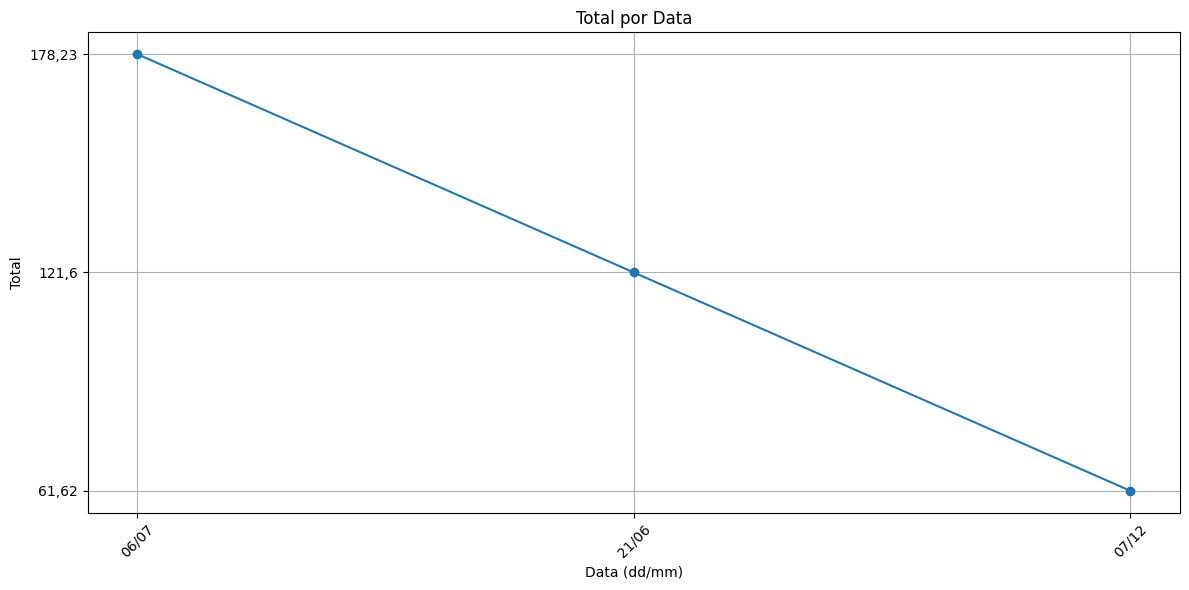

In [ ]:
# Converter a coluna 'Data' para o tipo datetime
dados['Data'] = pd.to_datetime(dados['Data'])

# Extrair o dia e o mês da coluna 'Data' e formatar como "dd/mm"
dados['Data'] = dados['Data'].dt.strftime('%d/%m')

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))  # Ajuste o tamanho da figura conforme necessário
plt.plot(dados['Data'], dados['Total'], marker='o', linestyle='-')

# Configurações do gráfico
plt.title('Total por Data')
plt.xlabel('Data (dd/mm)')
plt.ylabel('Total')
plt.grid(True)

# Rotacionar os rótulos do eixo X para melhorar a legibilidade (opcional)
plt.xticks(rotation=45)

# Inverter o eixo Y
plt.gca().invert_yaxis()

# Mostrar o gráfico
plt.tight_layout()  # Evitar que os rótulos se sobreponham
plt.show()

In [ ]:
import pandas as pd

# Ler o arquivo CSV
dados = pd.read_csv('gravimetria.csv', sep=',')

# Substituir todas as vírgulas por pontos em todo o DataFrame
dados = dados.replace(',', '.', regex=True)

# Visualizar o DataFrame com as vírgulas substituídas por pontos
print(dados)

         Data Media por barraca Organicos Palha Papel Papelao Plastico Outros  \
0    07/06/23             22.28    150.58   7.8  12.8     5.4      1.7      0   
1  21/06/2023             17.37      81.9   0.0   0.2     0.9      3.8   34.8   
2  12/07/2023             15.41     54.77   0.0  1.65     1.5        1    2.7   

    Total  
0  178.23  
1   121.6  
2   61.62  


In [ ]:
# Selecionar as variáveis de interesse para soma
variaveis_soma = ["Organicos", "Palha", "Papel", "Papelao", "Plastico", "Outros"]

# Função para somar e separar os valores em cada célula
def somar_e_separar(valores):
    valores = valores.split(',')
    valores = [float(valor.replace(',', '.')) for valor in valores]
    return sum(valores)

# Aplicar a função de soma e separação em cada variável
for variavel in variaveis_soma:
    dados[variavel] = dados[variavel].apply(somar_e_separar)

# Criar um novo DataFrame com uma única linha
dados_somados = pd.DataFrame({
    "Organicos": [dados["Organicos"].sum()],
    "Palha": [dados["Palha"].sum()],
    "Papel": [dados["Papel"].sum()],
    "Papelao": [dados["Papelao"].sum()],
    "Plastico": [dados["Plastico"].sum()],
    "Outros": [dados["Outros"].sum()]
})

# Visualizar o novo DataFrame
dados_somados.head(2)

,Organicos,Palha,Papel,Papelao,Plastico,Outros
0,287.25,7.8,14.65,7.8,6.5,37.5


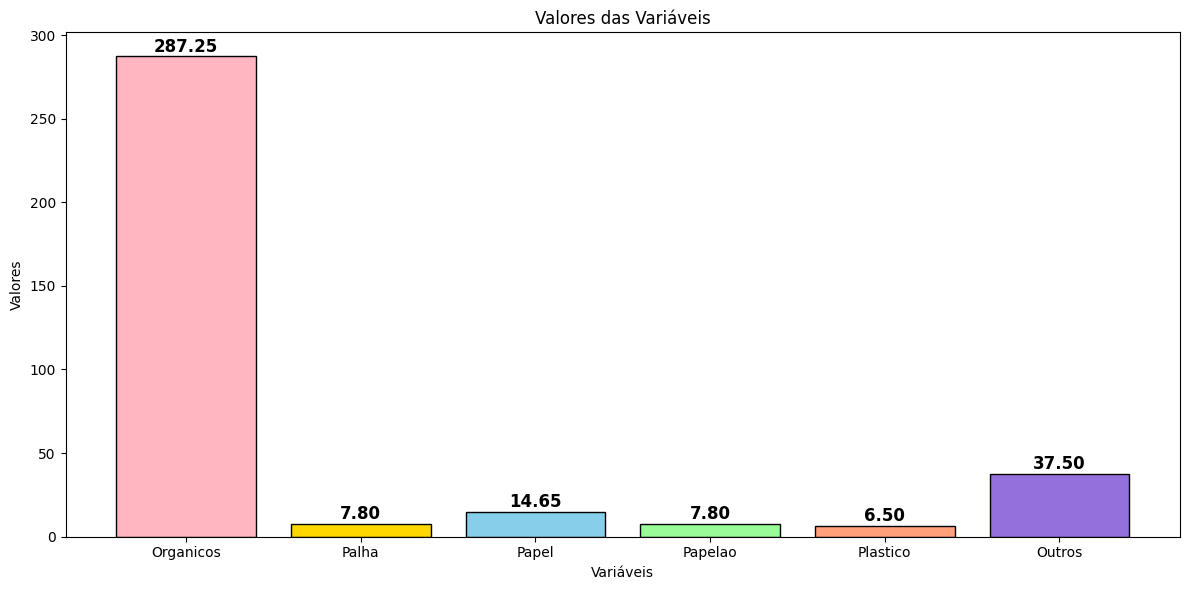

In [ ]:
# Selecionar as variáveis de interesse e seus valores
variaveis = ["Organicos", "Palha", "Papel", "Papelao", "Plastico", "Outros"]
valores = dados_somados.loc[0, variaveis]

# Definir cores da paleta pastel
cores_pastel = ['#FFB6C1', '#FFD700', '#87CEEB', '#98FB98', '#FFA07A', '#9370DB']

# Configurar a figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de barras
barras = plt.bar(variaveis, valores, color=cores_pastel, edgecolor='black')

# Adicionar rótulos aos valores nas colunas
for barra, valor in zip(barras, valores):
    plt.text(barra.get_x() + barra.get_width() / 2, valor + 0.5, f'{valor:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Configurações do gráfico
plt.title('Valores das Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Valores')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

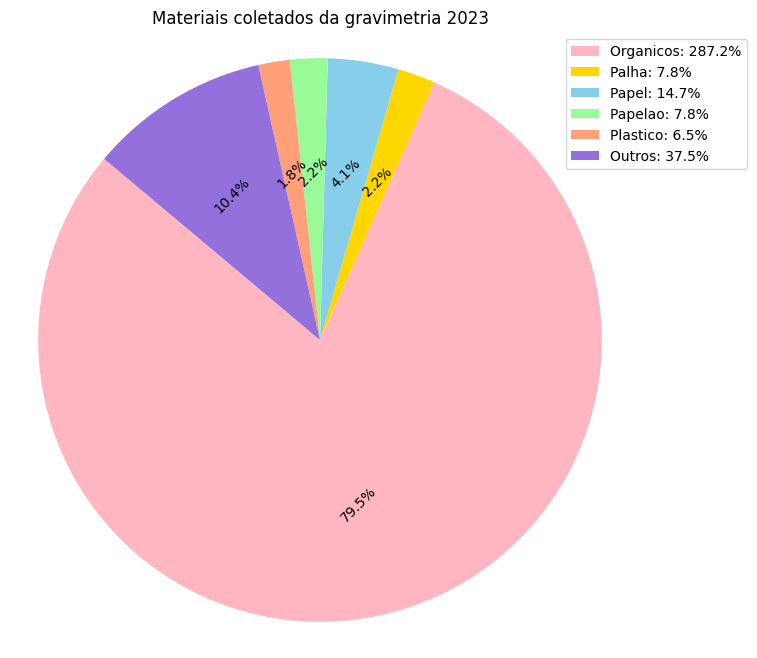

In [ ]:
# Selecionar as colunas de materiais para o gráfico de área empilhada
materiais = ["Organicos", "Palha", "Papel", "Papelao", "Plastico", "Outros"]

# Definir as cores da paleta pastel
cores_pastel = ['#FFB6C1', '#FFD700', '#87CEEB', '#98FB98', '#FFA07A', '#9370DB']

# Configurar a figura
plt.figure(figsize=(8, 8))

# Obter os valores correspondentes a essas variáveis
valores = dados_somados[variaveis].iloc[0]

# Criar o gráfico de pizza
patches, texts, autotexts = plt.pie(
    valores,
    labels=[''] * len(variaveis),
    colors=cores_pastel,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'rotation': 45}  # Inclinar o texto em 45 graus
)

# Criar uma legenda personalizada
legendas = [f"{materiais[i]}: {valores[i]:.1f}%" for i in range(len(materiais))]
plt.legend(legendas, loc='upper right', bbox_to_anchor=(1.2, 1))

# Configurações do gráfico
plt.title('Materiais coletados da gravimetria 2023')

# Mostrar o gráfico
plt.axis('equal')  # Para manter o aspecto circular
plt.show()

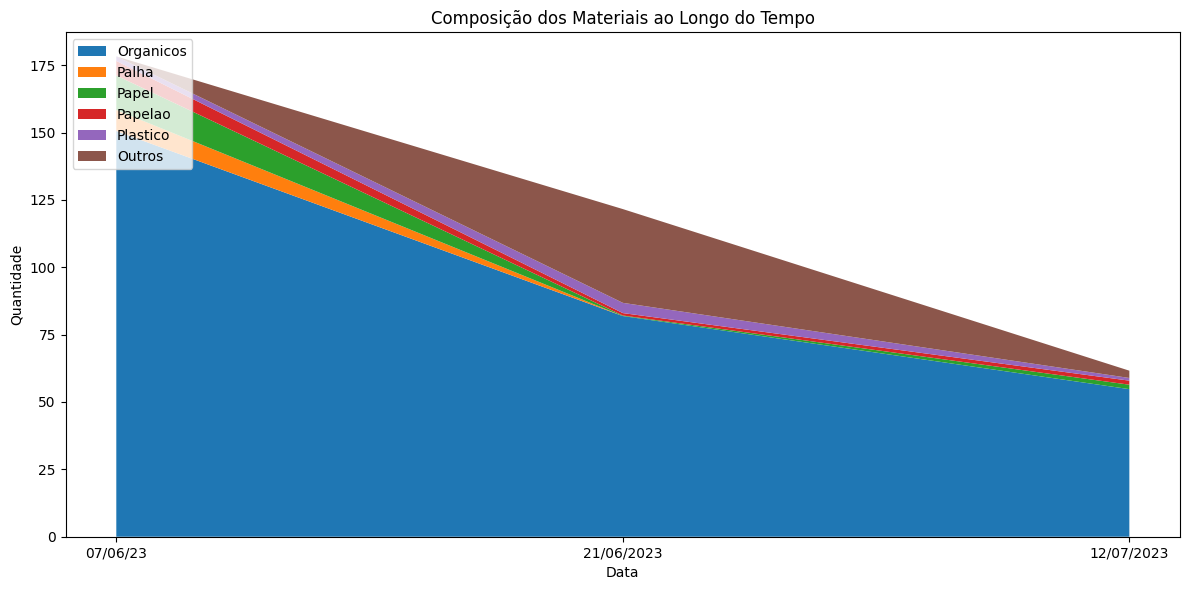

In [ ]:
# Selecionar as colunas de materiais para o gráfico de área empilhada
materiais = ["Organicos", "Palha", "Papel", "Papelao", "Plastico", "Outros"]

# Configurar a figura
plt.figure(figsize=(12, 6))

# Criar o gráfico de área empilhada
plt.stackplot(dados['Data'], dados[materiais].T, labels=materiais)

# Configurações do gráfico
plt.title('Composição dos Materiais ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade')
plt.legend(loc='upper left')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

**Feira feliz**

In [ ]:
dados = pd.read_csv('feirafeliz.csv', sep = ',')
dados.head(5)

,Mes,Consumo Humano em kg,Consumo Animal em kg,Compostagem em kg,Total em kg
0,agosto/2022,"39,30","48,88","87,90","176,1"
1,setembro/2022,"33,80","41,72","161,70","237,22"
2,outubro/2022,"63,90","51,28","125,38","240,56"
3,novembro/2022,"97,10","49,04","160,50","306,64"
4,dezembro/2022,"52,20","26,40","32,46","111,06"


**Temperatura Caixa d'água**

In [ ]:
dados = pd.read_csv('caixa_14.csv', sep = ',')
dados.head(5)

,Data,Temperatura ambiente,Temperatura media
0,29/06/2023,"23,2","24,67"
1,30/06/2023,"20,9","24,70"
2,03/07/2023,"20,8","23,47"
3,05/07/2023,"18,8","20,73"
4,06/07/2023,"23,1","26,70"


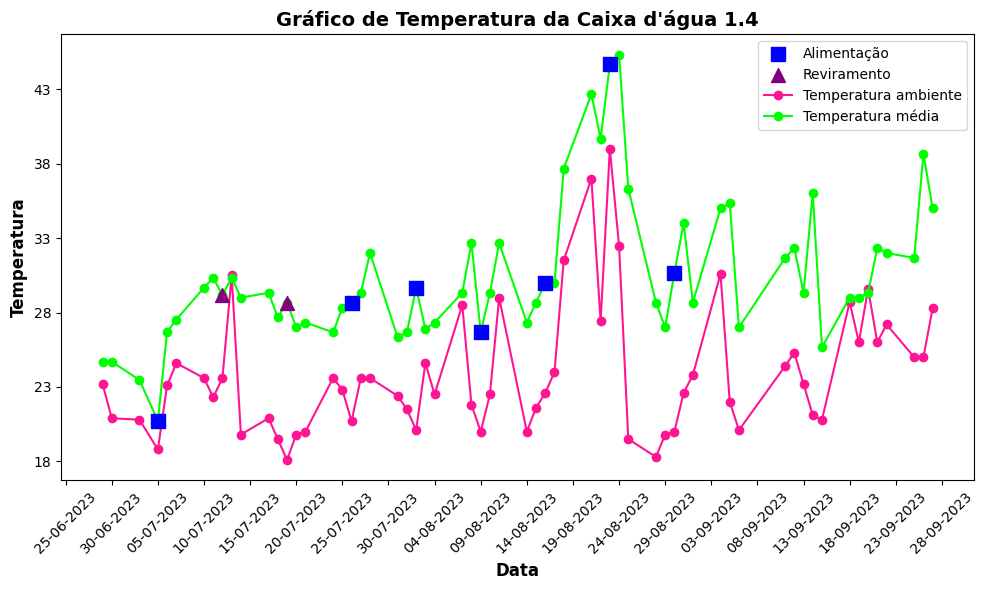

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_14.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['28/06/2023', '05/07/2023', '26/07/2023', '02/08/2023', '09/08/2023', '16/08/2023', '23/08/2023', '30/08/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['12/07/2023', '19/07/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 1.4', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

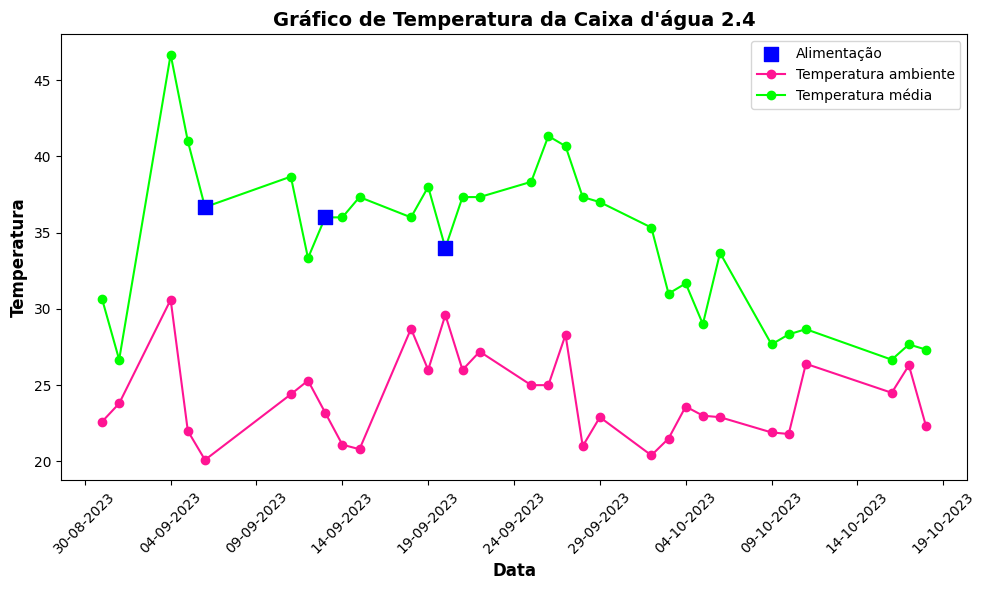

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_24.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['30/08/2023', '06/09/2023', '13/09/2023', '20/09/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 2.4', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

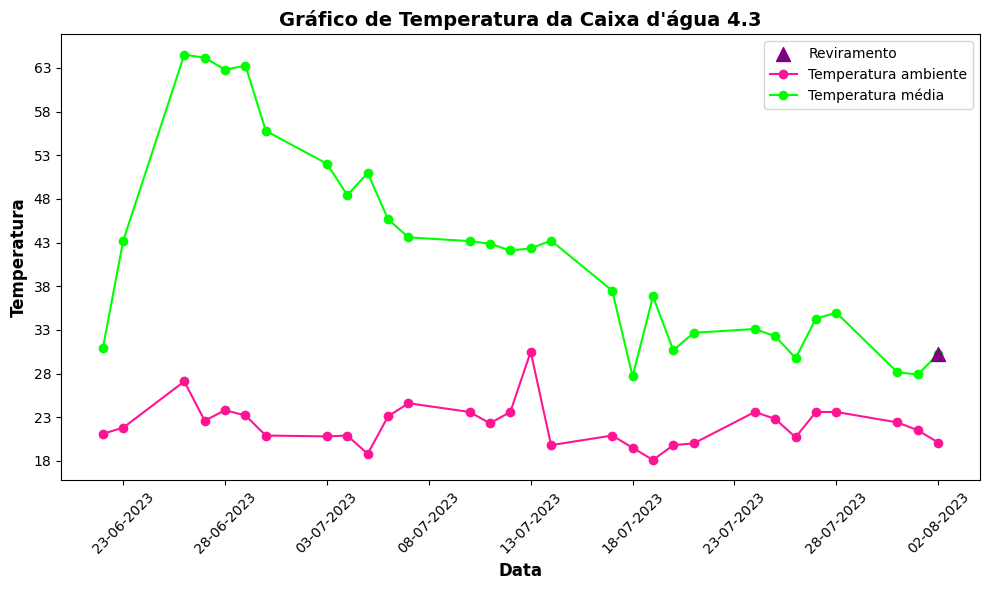

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_43.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['02/08/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 4.3', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

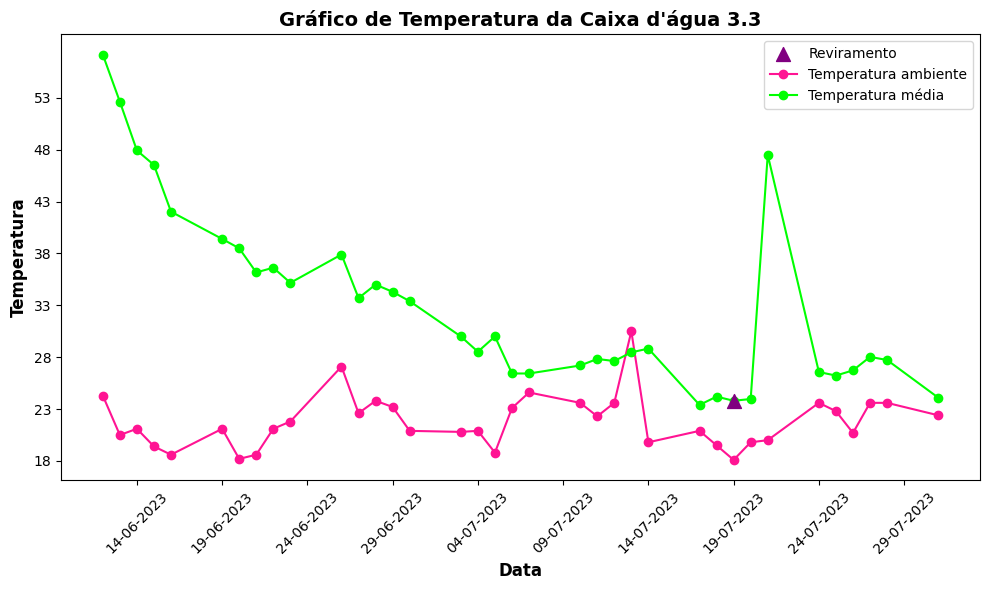

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_33.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['19/07/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 3.3', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

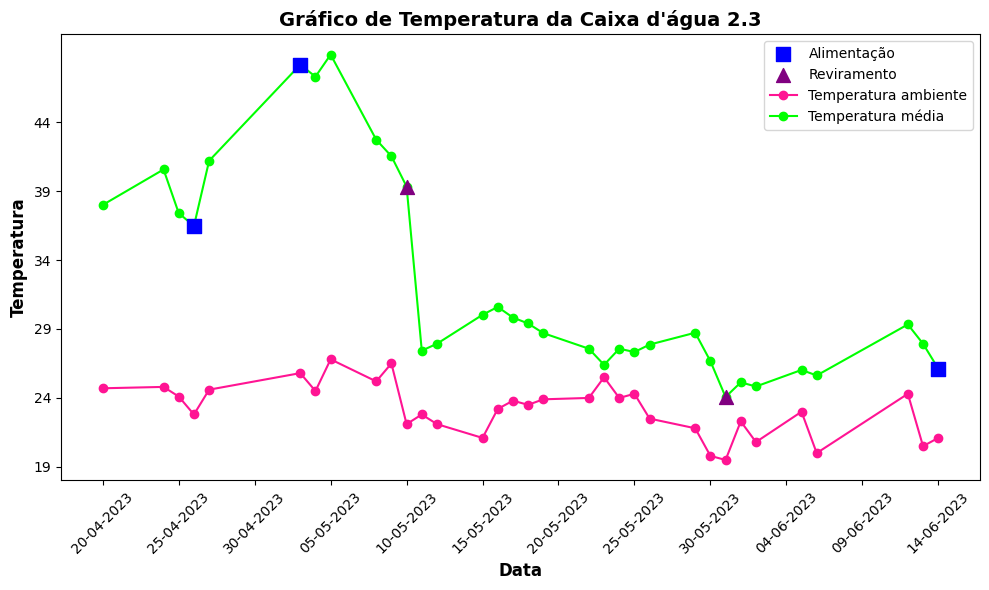

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_23.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['19/04/2023', '26/04/2023', '03/05/2023', '14/06/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['10/05/2023', '31/05/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 2.3', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

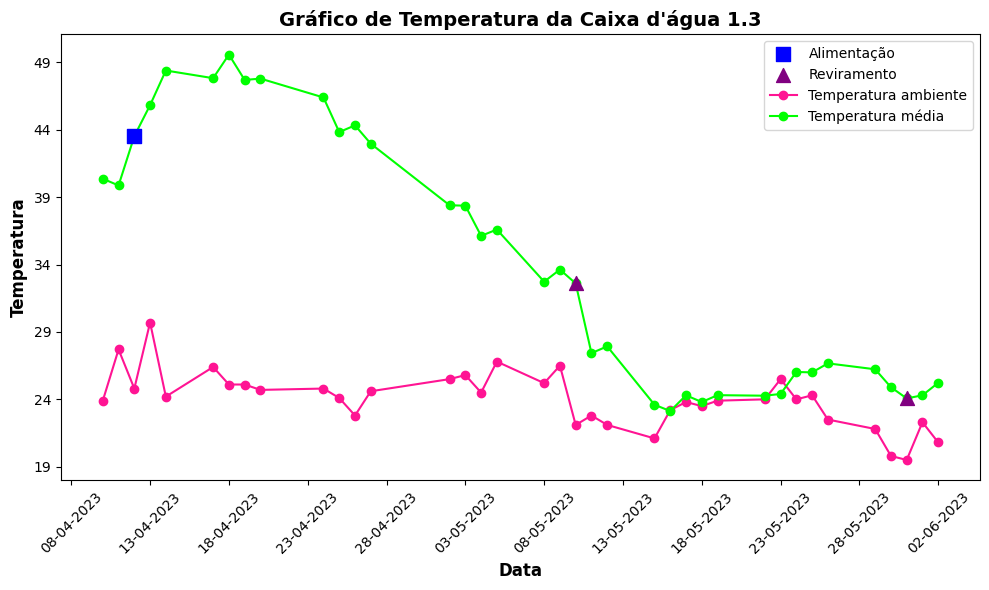

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_13.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['12/04/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['10/05/2023', '31/05/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 1.3', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

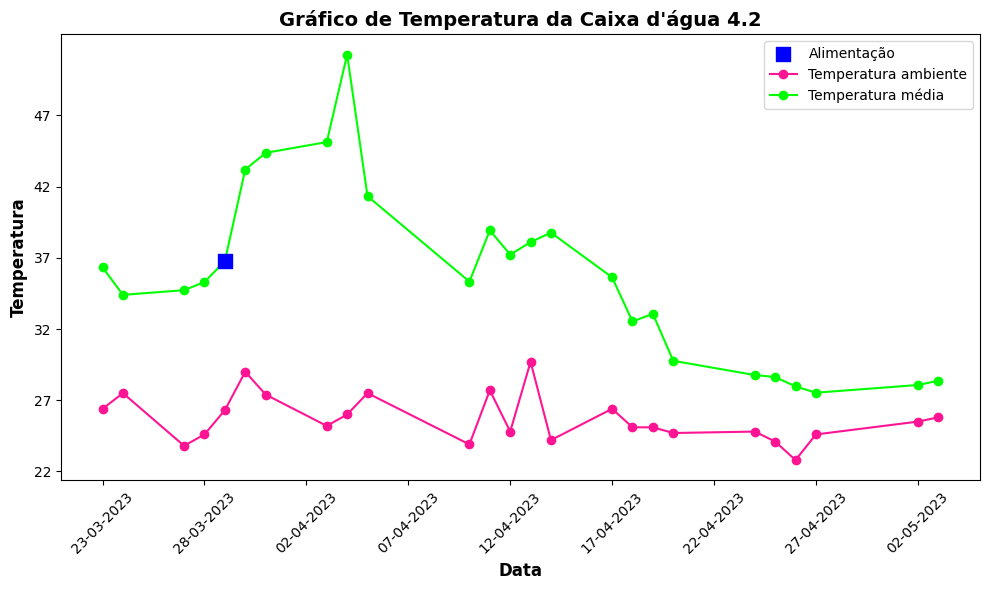

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_42.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['29/03/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 4.2', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

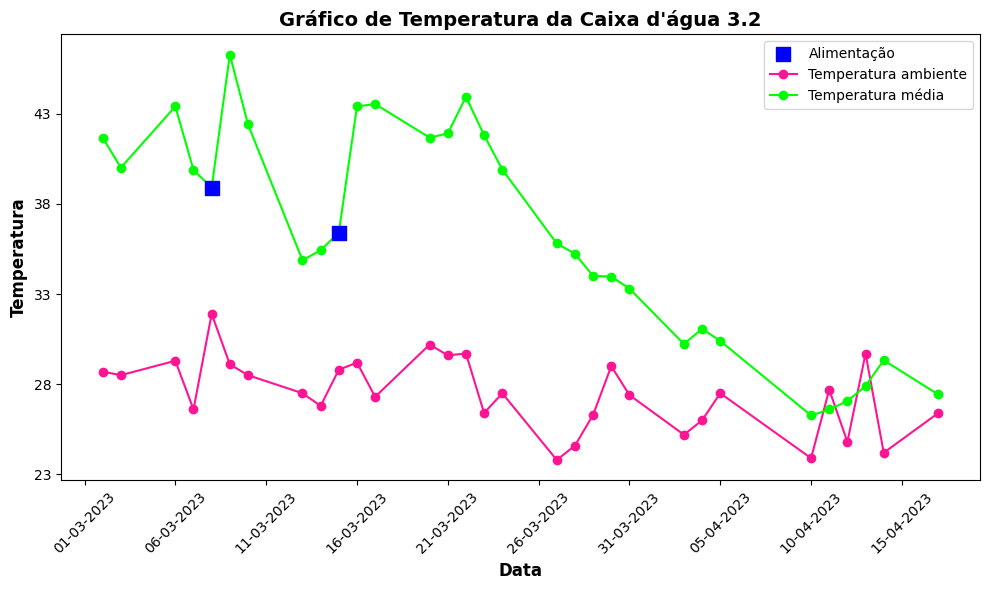

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_32.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['01/03/2023', '08/03/2023', '15/03/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 3.2', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

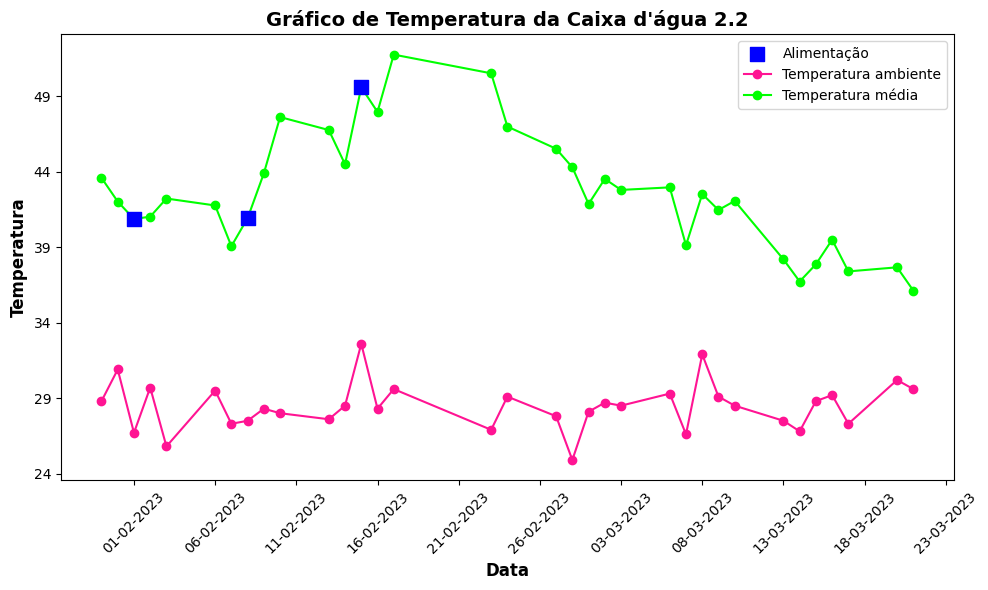

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_22.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['25/01/2023', '01/02/2023', '08/02/2023', '15/02/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 2.2', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

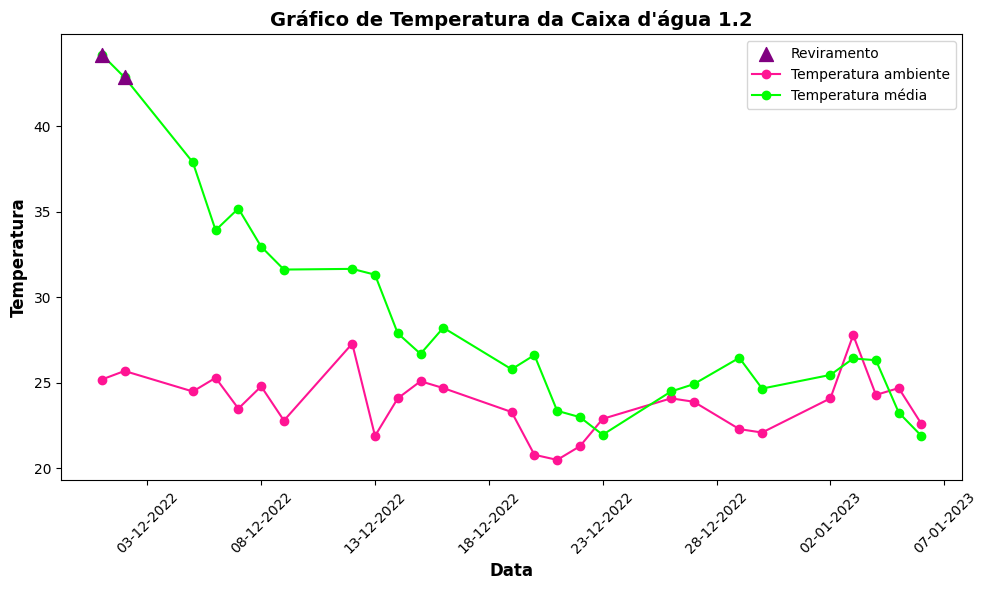

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_12.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['01/12/2022', '02/12/2022'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 1.2', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

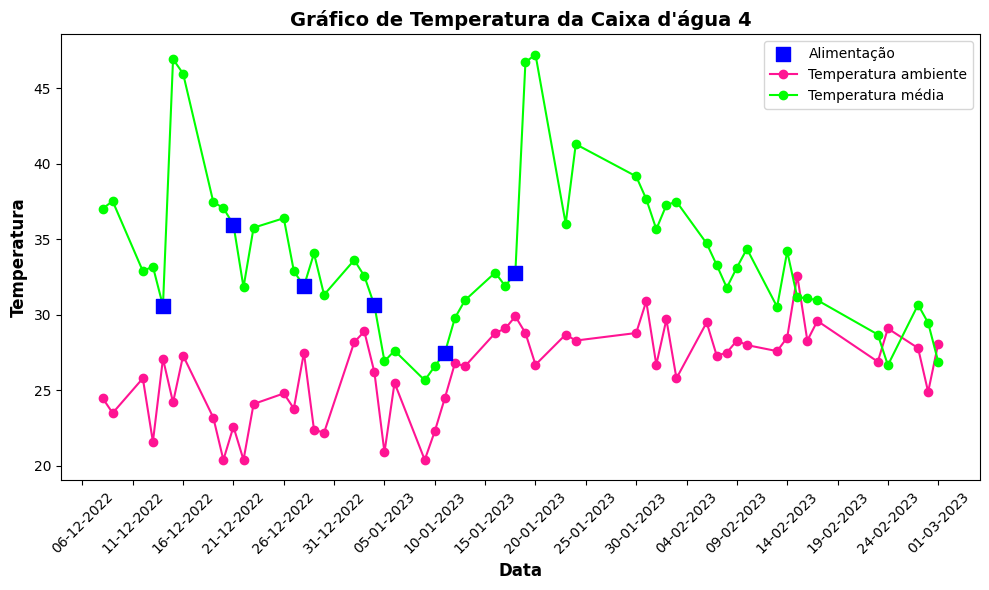

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('caixa_4.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['14/12/2022', '21/12/2022', '28/12/2022', '04/01/2023', '11/01/2023', '18/01/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura da Caixa d\'água 4', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

**Temperatura Pallet**

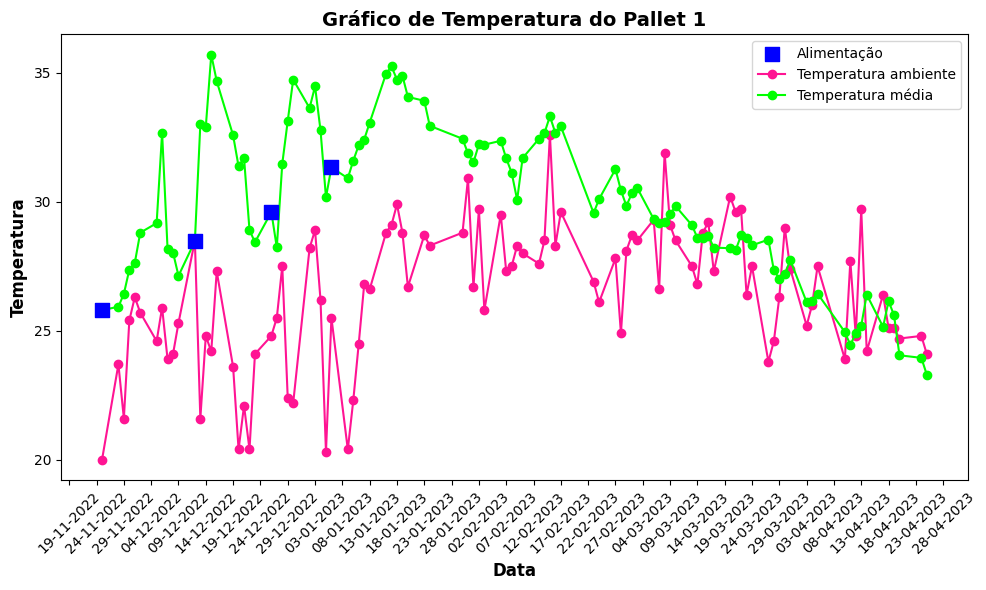

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('pallet_1.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['25/11/2022', '12/12/2022', '26/12/2022', '06/01/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura do Pallet 1', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

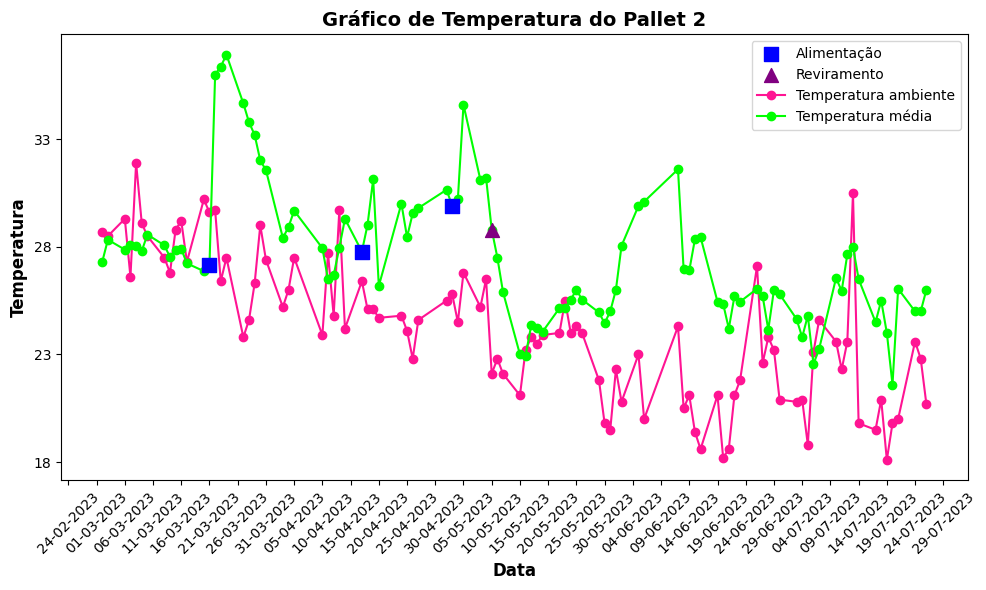

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('pallet_2.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['01/03/2023', '21/03/2023', '17/04/2023', '03/05/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Defina os dias que deseja destacar com triângulos roxos
dias_destacados = pd.to_datetime(['10/05/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias destacados
df_destacado = df[df['Data'].isin(dias_destacados)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Adicionar marcadores para triângulos roxos
plt.scatter(df_destacado['Data'], df_destacado['Temperatura media'], label='Reviramento', marker='^', color='purple', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura do Pallet 2', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

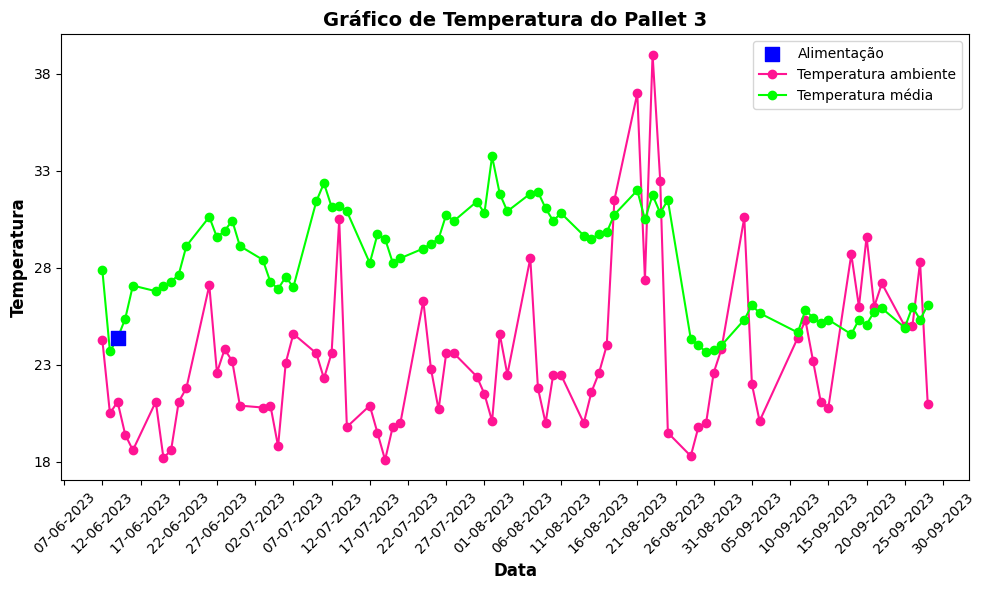

In [ ]:
# Carregando os dados do arquivo CSV
df = pd.read_csv('pallet_3.csv')

# Converte a coluna 'Data' para um formato de data com o formato 'dd-mm-aaaa'
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

# Ordena o DataFrame com base na coluna 'Data'
df = df.sort_values(by='Data')

# Substitui vírgulas por pontos nas colunas de temperatura
df['Temperatura ambiente'] = df['Temperatura ambiente'].str.replace(',', '.').astype(float)
df['Temperatura media'] = df['Temperatura media'].str.replace(',', '.').astype(float)

# Defina os dias que deseja destacar com quadrados azuis
dias_quadrados_azuis = pd.to_datetime(['06/06/2023', '14/06/2023'], format='%d/%m/%Y')

# Crie um novo DataFrame com os dados dos dias com quadrados azuis
df_quadrados_azuis = df[df['Data'].isin(dias_quadrados_azuis)]

# Plotando o gráfico de linhas
plt.figure(figsize=(10, 6))  # Define o tamanho da figura

# Adicionar marcadores para quadrados azuis
plt.scatter(df_quadrados_azuis['Data'], df_quadrados_azuis['Temperatura media'], label='Alimentação', marker='s', color='blue', s=100, zorder=3)

# Plotando a coluna 'Data' no eixo X e as colunas 'Temperatura ambiente' e 'Temperatura média' no eixo Y
plt.plot(df['Data'], df['Temperatura ambiente'], label='Temperatura ambiente', marker='o', color='deeppink', zorder=2)
plt.plot(df['Data'], df['Temperatura media'], label='Temperatura média', marker='o', color='lime', zorder=2)

# Configurando rótulos e título do gráfico
plt.xlabel('Data', fontsize=12, fontweight='bold')
plt.ylabel('Temperatura', fontsize=12, fontweight='bold')
plt.title('Gráfico de Temperatura do Pallet 3', fontsize=14, fontweight='bold')

# Adicionando legenda
plt.legend()

# Obtendo os limites mínimo e máximo das temperaturas
y_min = min(df['Temperatura ambiente'].min(), df['Temperatura media'].min())
y_max = max(df['Temperatura ambiente'].max(), df['Temperatura media'].max())

# Definindo os intervalos no eixo Y (temperatura) em ordem crescente
plt.yticks(range(int(y_min), int(y_max) + 1, 5))

# Configurando o intervalo no eixo X para aparecer de 5 em 5 dias e com o formato 'dd-mm-aaaa'
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

# Rotacionando os rótulos do eixo X para melhor visualização
plt.xticks(rotation=45)

# Exibindo o gráfico
plt.tight_layout()
plt.show()